In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import folium



In [2]:
data = pd.read_csv('Open311.csv')

In [3]:
data.head()

,service_request_id,requested_datetime,updated_datetime,closed_date,status_description,source,service_name,description,agency_responsible,address,city,state,zip,lat,long,Georeference,SLA Days
0,496,06/23/2011 04:00:00 AM,09/11/2016 10:02:05 PM,08/05/2011 01:25:12 PM,closed,Phone Call,Excessive Growth,lawn not mowed,HAND,2611 E Roundhill LN,Bloomington,IN,47401.0,39.139652,-86.500938,POINT (-86.50093842 39.13965225),9.0
1,506,06/22/2011 04:00:00 AM,09/11/2016 10:02:05 PM,08/05/2011 01:25:48 PM,closed,Phone Call,Excessive Growth,"Never mows grass, two cars that never move par...",HAND,2611 E Roundhill LN,Bloomington,IN,47401.0,39.139652,-86.500938,POINT (-86.50093842 39.13965225),9.0
2,546,06/21/2011 04:00:00 AM,09/11/2016 10:02:05 PM,03/02/2012 04:00:57 PM,closed,Phone Call,Excessive Growth,Tall grass.,HAND,3209 S Autumn LN,Bloomington,IN,47401.0,39.134514,-86.506477,POINT (-86.50647736 39.13451385),9.0
3,569,06/20/2011 04:00:00 AM,09/11/2016 10:02:05 PM,06/20/2011 04:00:00 AM,closed,Phone Call,Excessive Growth,This is the property that was formally the Dow...,HAND,508 N Morton ST,Bloomington,IN,47404.0,39.170776,-86.535934,POINT (-86.53593445 39.17077637),9.0
4,620,06/13/2011 04:00:00 AM,10/05/2020 02:42:52 PM,06/13/2011 04:00:00 AM,closed,Phone Call,Excessive Growth,Tall grass,NaN,1301 W Woodhill DR,Bloomington,IN,47403.0,39.157001,-86.547485,POINT (-86.54748535 39.1570015),9.0


In [4]:
data.columns

Index(['service_request_id', 'requested_datetime', 'updated_datetime',
       'closed_date', 'status_description', 'source', 'service_name',
       'description', 'agency_responsible', 'address', 'city', 'state', 'zip',
       'lat', 'long', 'Georeference', 'SLA Days'],
      dtype='object')

In [5]:
print(data.service_name.unique())

['Excessive Growth' 'Other' 'Trash' 'Water Quality' 'Street Lights'
 'Traffic Signals' 'Line of Sight' 'Parks & Playgrounds' 'Blocked Street'
 'Leaf Collection' 'Traffic Related Complaints' 'Nuisance Lights'
 'Blocked Sidewalk' 'City Performance' 'Parking Meters and Citations'
 'City Construction Projects' 'Potholes, Other Street Repair'
 'Animal Control & Neglected Pets' 'Recycling'
 'Temporary Signage w/o permit' 'Bus Services (Bloomington Transit)'
 'Biking & Walking' 'Request a new Street Light' 'Trails'
 'Parking on Unimproved Surface' 'Street Trees' 'Street & Traffic Signs'
 'Sewer Problems (Storm Sewers)' 'Report issues with Lime scooters'
 'Unsafe Buildings' 'Water Utility Problems'
 'Sewer Problems (Sanitary Sewers)'
 'Scooters, Bike-share and Related Issues' 'Traffic Suggestions'
 'Sidewalk & Curb Complaints' 'Water Utility Billing Problems'
 'Fire Hazards' 'Debris Removal' 'Parks & Rec Buildings'
 'Sidewalk Snow Removal' 'Website & Web Services Feedback'
 'Parking Garages' '

In [6]:
data.agency_responsible.unique()


array(['HAND', nan, 'Engineering', 'Police Department',
       'Utilities Water Quality', 'Planning and Transportation',
       'Street Department', 'Utilities T & D', 'Public Works Department',
       'Facilities', 'Parks and Recreation', 'Utilities Customer Service',
       'Utilities Environmental', 'Parking Services',
       'Information and Technology Services', 'Sanitation Department',
       'Animal Control', 'Fire Department', 'Mayors Office', 'Transit',
       'Risk Department', 'Legal Department', 'Utilities Engineering',
       'Community and Family Resources', "Utilities Director's Office",
       'Human Resources', 'Economic Development',
       'Utilities Finance Office', 'Mobility', 'Utilities Meter Services',
       'Council Office', "Mayor's Office", 'City Clerk'], dtype=object)

In [7]:
data.source.unique()

array(['Phone Call', nan, 'Walk In', 'Email', 'Other', 'Web Form',
       'Letter', 'Constituant Meeting', 'Mayor Email', 'Mail',
       'Do Not Contact', 'Police Report', 'NeighborLink',
       'Meeting with the Mayor'], dtype=object)

In [8]:
data.city.unique()

array(['Bloomington', nan, 'Clear Creek'], dtype=object)

In [9]:
data['SLA Days'].unique()

array([ 9., nan,  7.,  2.])

In [10]:
data.status_description.unique()

array(['closed', 'open'], dtype=object)

In [11]:
data.requested_datetime.isna().sum()

0

In [12]:
data.requested_datetime

0         06/23/2011 04:00:00 AM
1         06/22/2011 04:00:00 AM
2         06/21/2011 04:00:00 AM
3         06/20/2011 04:00:00 AM
4         06/13/2011 04:00:00 AM
                   ...          
111126    09/21/2023 12:37:49 PM
111127    09/21/2023 04:17:49 PM
111128    09/21/2023 07:27:42 AM
111129    09/21/2023 12:35:35 PM
111130    09/21/2023 12:36:28 PM
Name: requested_datetime, Length: 111131, dtype: object

In [13]:
# convert series to datetime
data.requested_datetime = pd.to_datetime(data.requested_datetime)
data.updated_datetime  = pd.to_datetime(data.updated_datetime)
data.closed_date = pd.to_datetime(data.closed_date) 

In [14]:
type(data.requested_datetime[0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
help(data.requested_datetime[0])

Help on Timestamp in module pandas._libs.tslibs.timestamps object:

class Timestamp(_Timestamp)
 |  Timestamp(ts_input=<object object at 0x000001A08BCA3440>, freq=None, tz=None, unit=None, year=None, month=None, day=None, hour=None, minute=None, second=None, microsecond=None, nanosecond=None, tzinfo=None, *, fold=None)
 |  
 |  Pandas replacement for python datetime.datetime object.
 |  
 |  Timestamp is the pandas equivalent of python's Datetime
 |  and is interchangeable with it in most cases. It's the type used
 |  for the entries that make up a DatetimeIndex, and other timeseries
 |  oriented data structures in pandas.
 |  
 |  Parameters
 |  ----------
 |  ts_input : datetime-like, str, int, float
 |      Value to be converted to Timestamp.
 |  freq : str, DateOffset
 |      Offset which Timestamp will have.
 |  tz : str, pytz.timezone, dateutil.tz.tzfile or None
 |      Time zone for time which Timestamp will have.
 |  unit : str
 |      Unit used for conversion if ts_input is of

In [16]:
#only getting the year in the requested_datetime column
data.requested_datetime.dt.year.unique()


array([2011, 2010, 1995, 2023, 2009, 1999, 2008, 2007, 2006, 2005, 1998,
       2004, 2003, 2002, 1997, 2001, 2000, 1996, 1970, 2014, 2017, 1980,
       2012, 2013, 2022, 2015, 2016, 2018, 2019, 2020, 2021, 1994, 1990],
      dtype=int64)

<Axes: xlabel='requested_datetime', ylabel='count'>

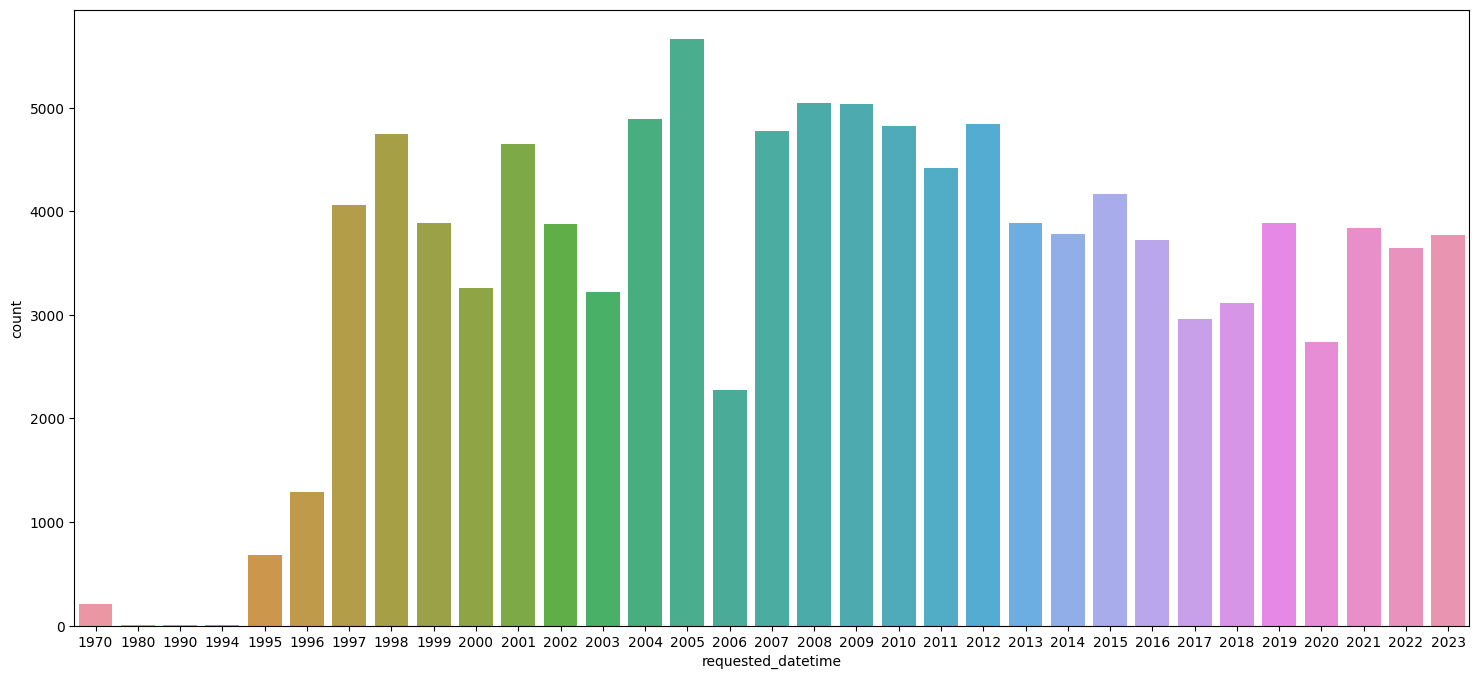

In [17]:
plt.figure(figsize=(18,8))
sns.countplot(data=data, x=data.requested_datetime.dt.year)


In [18]:
#Thinking of dropping the year 1970, 1980, 1990, 1994 because they have very few observations
#Even though 1970 has 205 observations, it is 50 Years ago and I don't think it will be relevant to the analysis
data = data.drop(data[(data.requested_datetime.dt.year == 1970) | (data.requested_datetime.dt.year == 1980) | (data.requested_datetime.dt.year == 1990) | (data.requested_datetime.dt.year == 1994)].index)

<Axes: xlabel='requested_datetime', ylabel='count'>

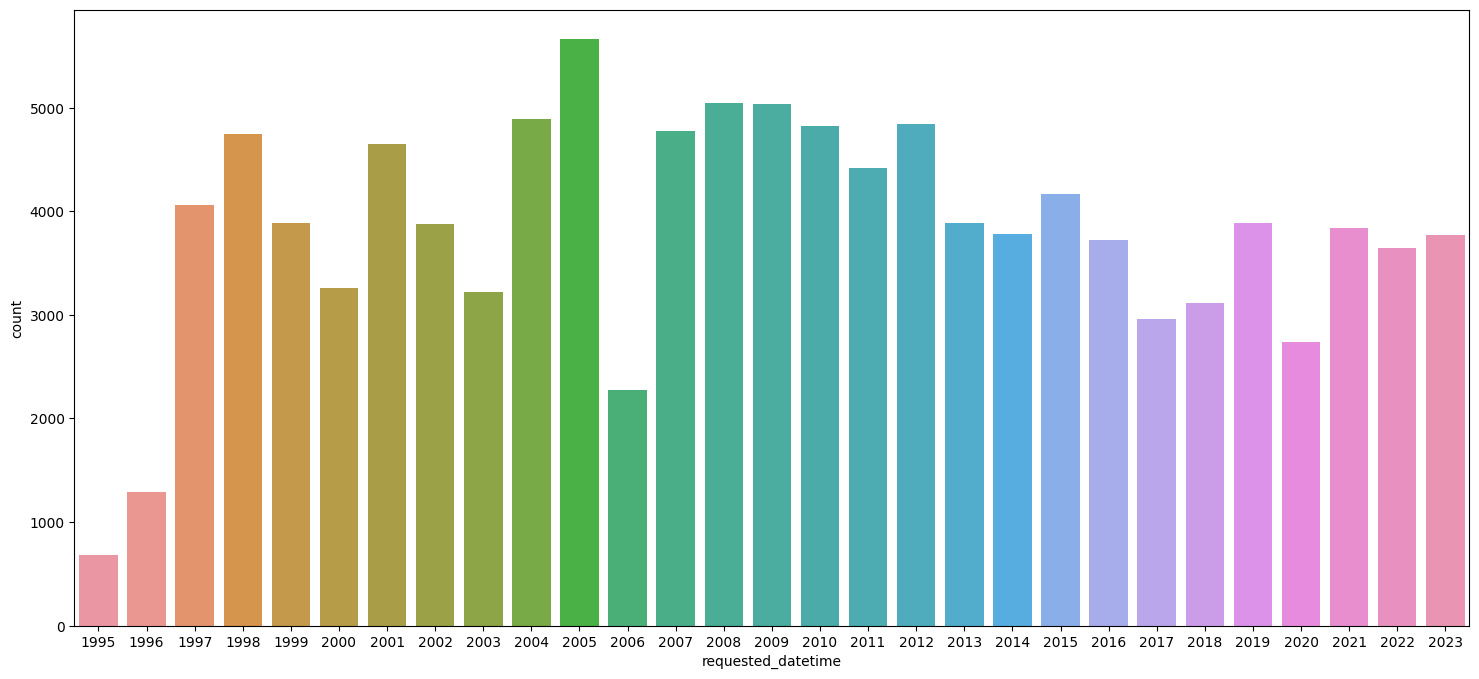

In [19]:
plt.figure(figsize=(18,8))
sns.countplot(data=data, x=data.requested_datetime.dt.year)

In [20]:
# data.to_csv('Cleaned_Open311.csv', index=False)


Text(0.5, 0, 'Month')

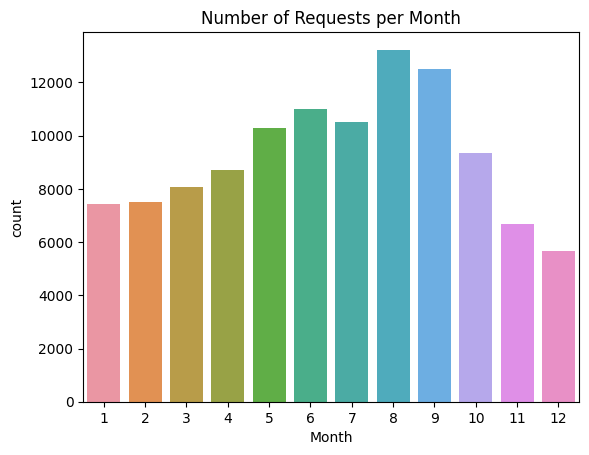

In [21]:
sns.countplot(data=data, x=data.requested_datetime.dt.month)
plt.title('Number of Requests per Month')
plt.xlabel('Month')


In [22]:
data_2023 = data[data.requested_datetime.dt.year == 2023]

Text(0.5, 0, 'Month')

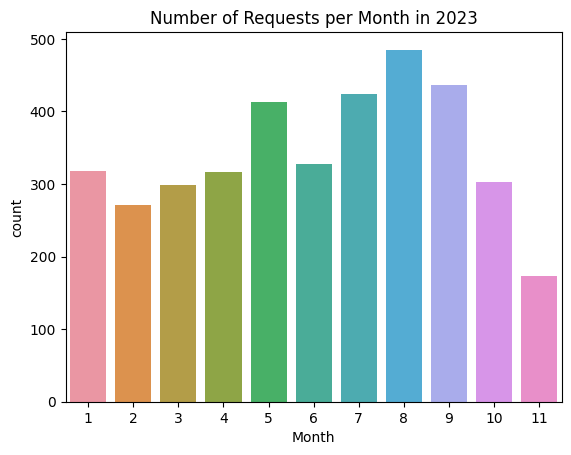

In [23]:
sns.countplot(data=data_2023, x=data_2023.requested_datetime.dt.month)
plt.title('Number of Requests per Month in 2023')
plt.xlabel('Month')

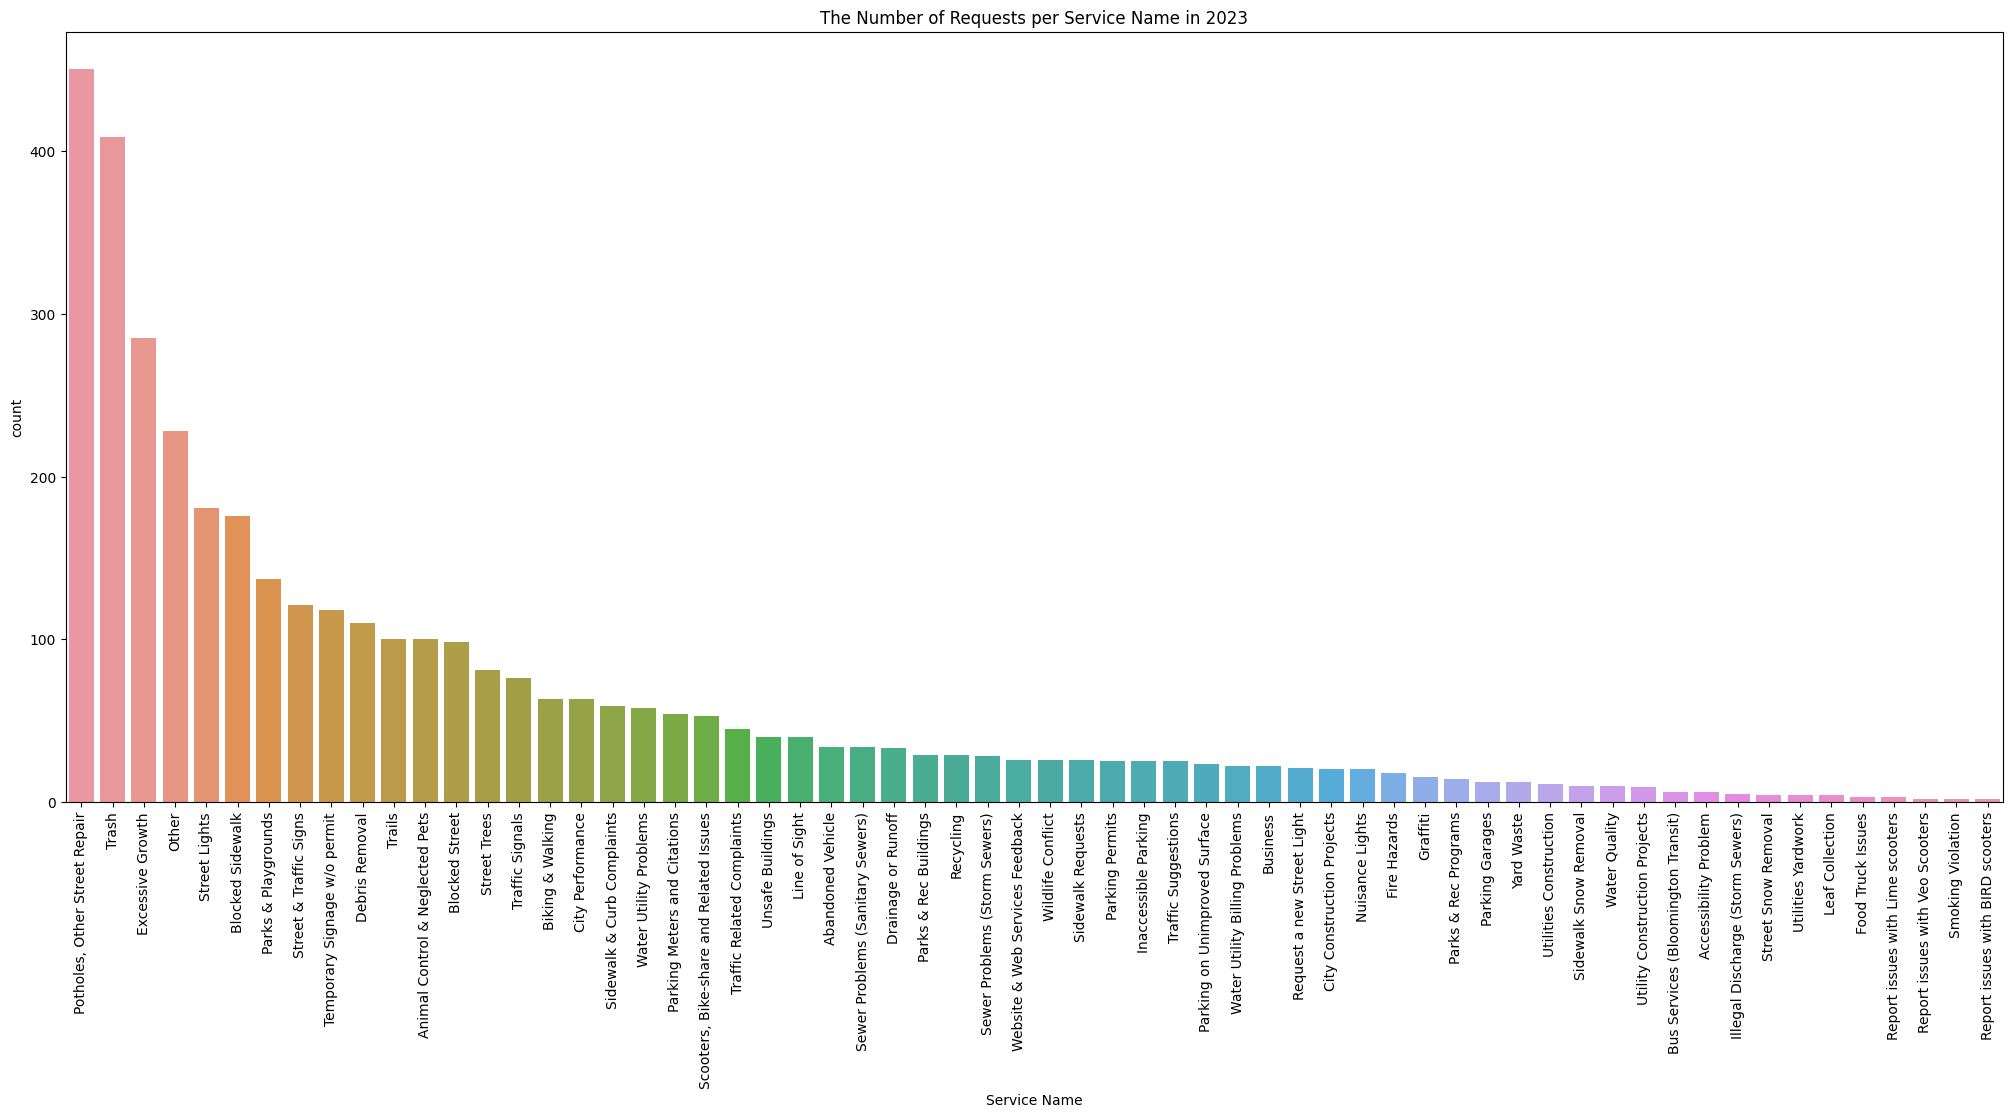

In [24]:
# Get the order of service names based on their count
ordered_service_names = data_2023['service_name'].value_counts().index

plt.figure(figsize=(25,10))
sns.countplot(data=data_2023, x=data_2023.service_name, order=ordered_service_names)
plt.xticks(rotation=90, fontsize=10)
plt.title('The Number of Requests per Service Name in 2023')
plt.xlabel('Service Name')
plt.show()




In [25]:
#Focusing only on 'Potholes and Other Street Repair' data because it is the highest number of requests
streetRepairs_2023 = data_2023[data_2023['service_name'] == 'Potholes, Other Street Repair']

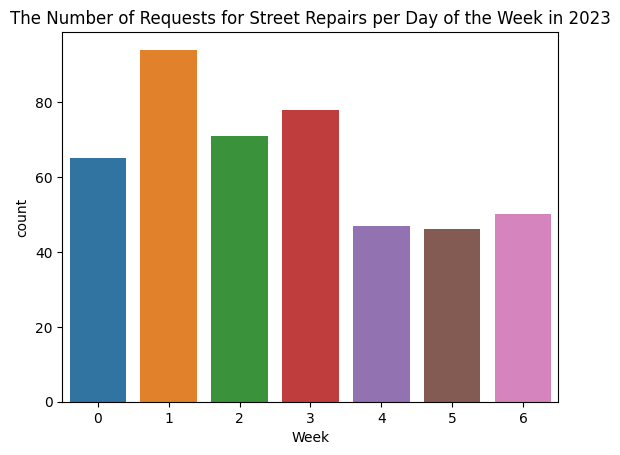

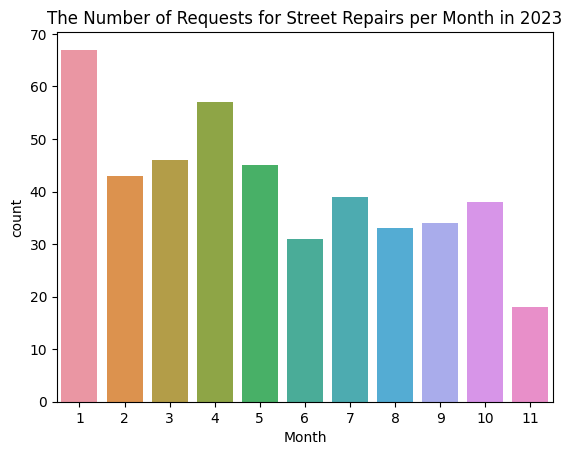

In [26]:


sns.countplot(data=streetRepairs_2023, x=streetRepairs_2023.requested_datetime.dt.day_of_week)
plt.title('The Number of Requests for Street Repairs per Day of the Week in 2023')
plt.xlabel('Week')
plt.show()


sns.countplot(data=streetRepairs_2023, x=streetRepairs_2023.requested_datetime.dt.month)
plt.title('The Number of Requests for Street Repairs per Month in 2023')
plt.xlabel('Month')
plt.show()





In [27]:
print(len(streetRepairs_2023[['lat', 'long', 'zip']]))
print(streetRepairs_2023[['lat', 'long', 'zip']].isna().sum())

451
lat     123
long    123
zip     225
dtype: int64


In [28]:
# Drop rows from the streetRepairs_2023 DataFrame where both 'lat' and 'long' columns are NaN.
# - subset=['lat', 'long'] specifies that we're only considering the 'lat' and 'long' columns for NaN checks.
# - how='all' ensures that a row is dropped only if ALL values in the specified subset are NaN.

streetRepairs_2023 = streetRepairs_2023.dropna(subset=['lat', 'long'], how='all')
data = data.dropna(subset=['lat', 'long'], how='all')

In [29]:
print(streetRepairs_2023[['lat', 'long', 'zip']].isna().sum())

lat       0
long      0
zip     102
dtype: int64


In [30]:

# Create a base map centered around Bloomington
m = folium.Map(location=[39.1653, -86.5264], zoom_start=13)  # Approximate coordinates of Bloomington

# Iterate over the lat and long columns and add markers to the map
for lat, lon in zip(streetRepairs_2023['lat'], streetRepairs_2023['long']):
        folium.Circle([lat, lon]).add_to(m)

# Display the map
m


In [31]:
from folium.plugins import HeatMap
# Create a base map centered around Bloomington
m = folium.Map(location=[39.1653, -86.5264], zoom_start=13)  # Approximate coordinates of Bloomington


# Create a list of (latitude, longitude) pairs
heat_data = list(zip(streetRepairs_2023['lat'].dropna(), streetRepairs_2023['long'].dropna()))

# Add a heatmap layer to the map
folium.plugins.HeatMap(heat_data).add_to(m)

# Display the map
m


In [32]:
# data_2023[data_2023['service_name'] == 'Trash']
# Create a base map centered around Bloomington
m = folium.Map(location=[39.1653, -86.5264], zoom_start=14)  # Approximate coordinates of Bloomington


# Create a list of (latitude, longitude) pairs
heat_data = list(zip(data_2023[data_2023['service_name'] == 'Trash']['lat'].dropna(), data_2023[data_2023['service_name'] == 'Trash']['long'].dropna()))

# Add a heatmap layer to the map
folium.plugins.HeatMap(heat_data).add_to(m)

# Display the map
m


In [33]:
#All services
m = folium.Map(location=[39.1653, -86.5264], zoom_start=14)  # Approximate coordinates of Bloomington
heat_data = list(zip(data_2023[data_2023['service_name'] == 'Excessive Growth']['lat'].dropna(), data_2023[data_2023['service_name'] == 'Excessive Growth']['long'].dropna()))
folium.plugins.HeatMap(heat_data).add_to(m)
m


In [34]:
data.service_name.unique()

array(['Excessive Growth', 'Other', 'Trash', 'Street Lights',
       'Traffic Signals', 'Line of Sight', 'Parks & Playgrounds',
       'Blocked Street', 'Leaf Collection', 'Nuisance Lights',
       'Blocked Sidewalk', 'City Performance',
       'Parking Meters and Citations', 'City Construction Projects',
       'Potholes, Other Street Repair', 'Biking & Walking',
       'Request a new Street Light', 'Trails',
       'Parking on Unimproved Surface', 'Street Trees',
       'Street & Traffic Signs', 'Report issues with Lime scooters',
       'Unsafe Buildings', 'Water Utility Problems',
       'Animal Control & Neglected Pets',
       'Sewer Problems (Sanitary Sewers)',
       'Scooters, Bike-share and Related Issues',
       'Temporary Signage w/o permit', 'Fire Hazards', 'Debris Removal',
       'Parks & Rec Buildings', 'Water Quality',
       'Website & Web Services Feedback', 'Parking Garages',
       'Public Works Projects', 'Traffic Related Complaints',
       'Yard Waste', 'Access

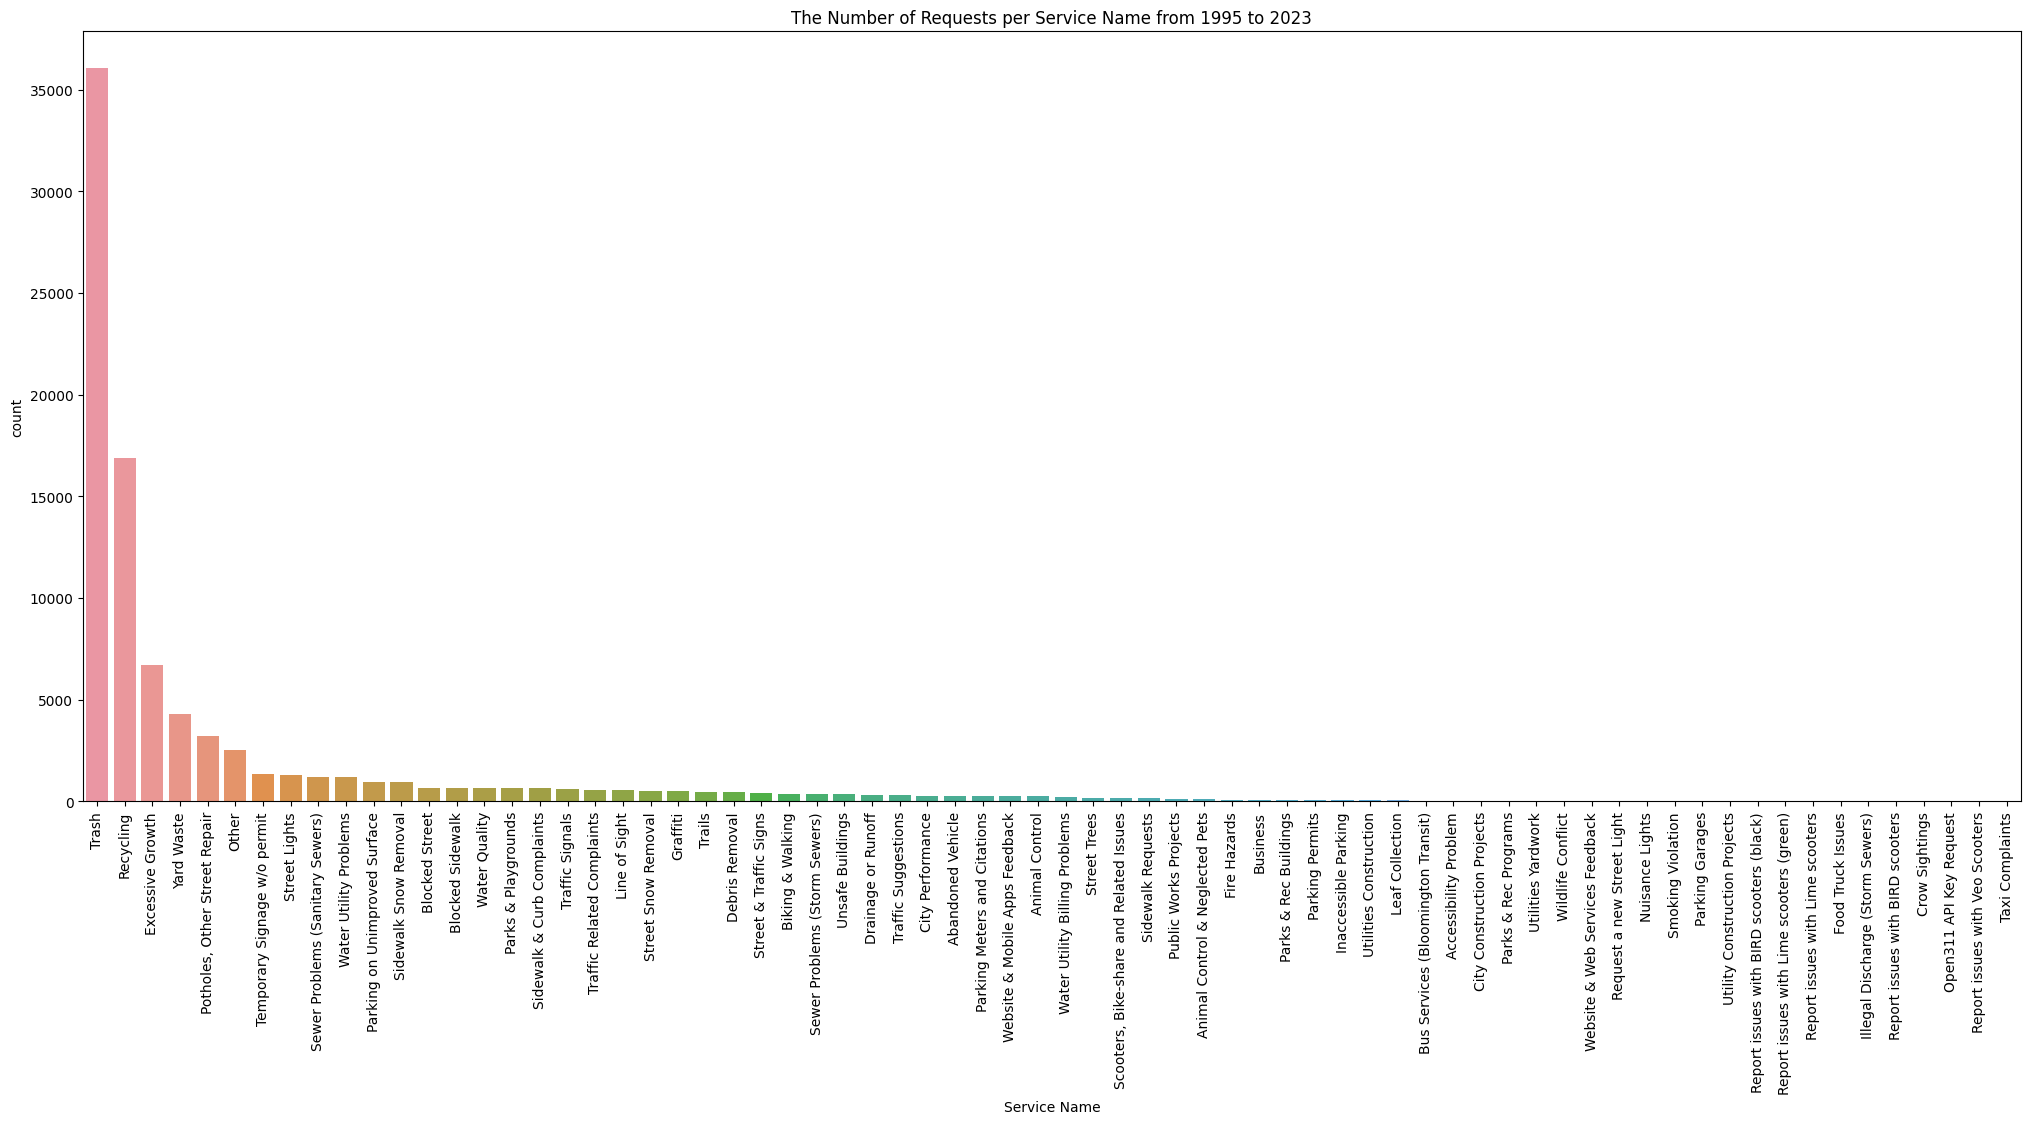

In [35]:
# Get the order of service names based on their count
ordered_service_names = data['service_name'].value_counts().index

plt.figure(figsize=(25,10))
sns.countplot(data=data, x=data.service_name, order=ordered_service_names)
plt.xticks(rotation=90, fontsize=10)
plt.title('The Number of Requests per Service Name from 1995 to 2023')
plt.xlabel('Service Name')
plt.show()




In [36]:
data[data.service_name ==  'Trash'][['long', 'lat']]

,long,lat
5854,-86.517151,39.150372
7284,-86.543137,39.168514
7515,-86.537247,39.138996
7585,-86.530647,39.173698
7586,-86.530479,39.172794
...,...,...
111006,-86.483154,39.167805
111011,-86.529984,39.168743
111079,-86.531273,39.173630
111080,-86.530479,39.172794


In [37]:
import plotly.express as px

# Filter the data
trash_data = data[data.service_name == 'Trash']

# Create the map
fig = px.scatter_mapbox(trash_data, 
                        lat="lat", 
                        lon="long", 
                        zoom=12, 
                        title="Trash Service Requests",
                        mapbox_style="open-street-map", opacity=0.2)

fig.show()


In [38]:
TrashData = data[data.service_name ==  'Trash']

In [39]:
TrashData.columns

Index(['service_request_id', 'requested_datetime', 'updated_datetime',
       'closed_date', 'status_description', 'source', 'service_name',
       'description', 'agency_responsible', 'address', 'city', 'state', 'zip',
       'lat', 'long', 'Georeference', 'SLA Days'],
      dtype='object')

### Trend Analysis for Trash Data 

In [40]:
daily_requests = TrashData.groupby('requested_datetime').size().reset_index(name='number_of_requests')


In [41]:
daily_requests

,requested_datetime,number_of_requests
0,1995-01-05 05:00:00,1
1,1995-05-17 05:00:00,1
2,1995-09-18 05:00:00,1
3,1995-10-23 05:00:00,2
4,1996-01-23 05:00:00,1
...,...,...
10500,2023-11-21 12:36:37,1
10501,2023-11-21 12:45:08,1
10502,2023-11-21 14:03:00,1
10503,2023-11-22 14:28:32,1


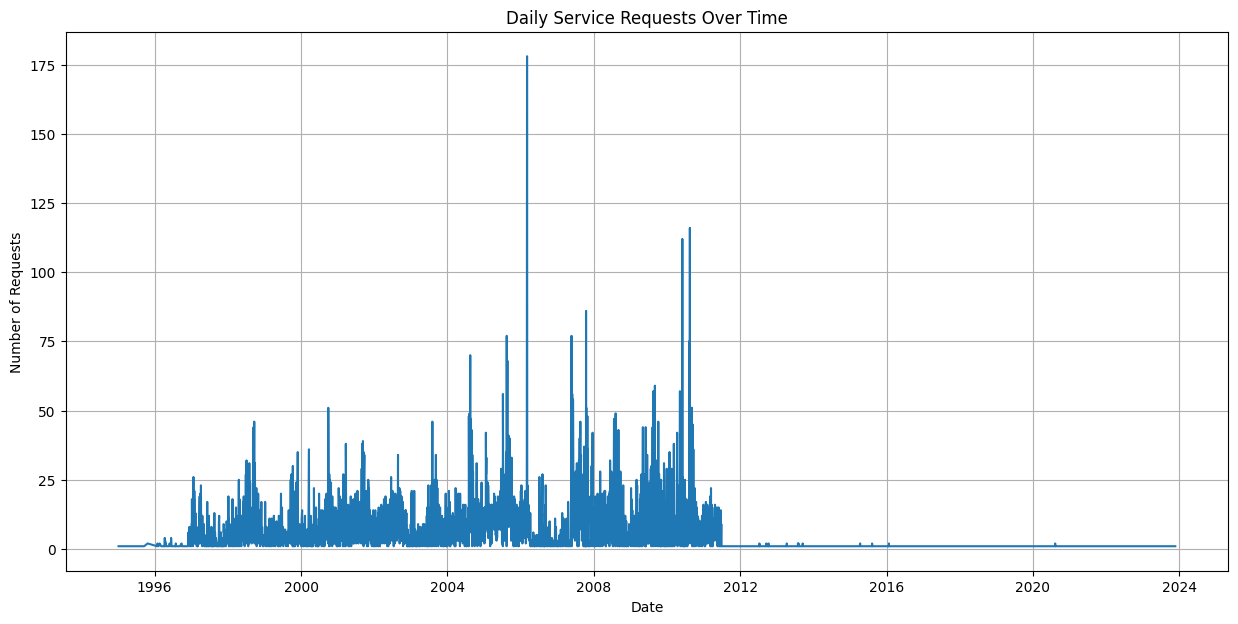

In [42]:
plt.figure(figsize=(15,7))
plt.plot(daily_requests['requested_datetime'], daily_requests['number_of_requests'])
plt.title('Daily Service Requests Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.show()


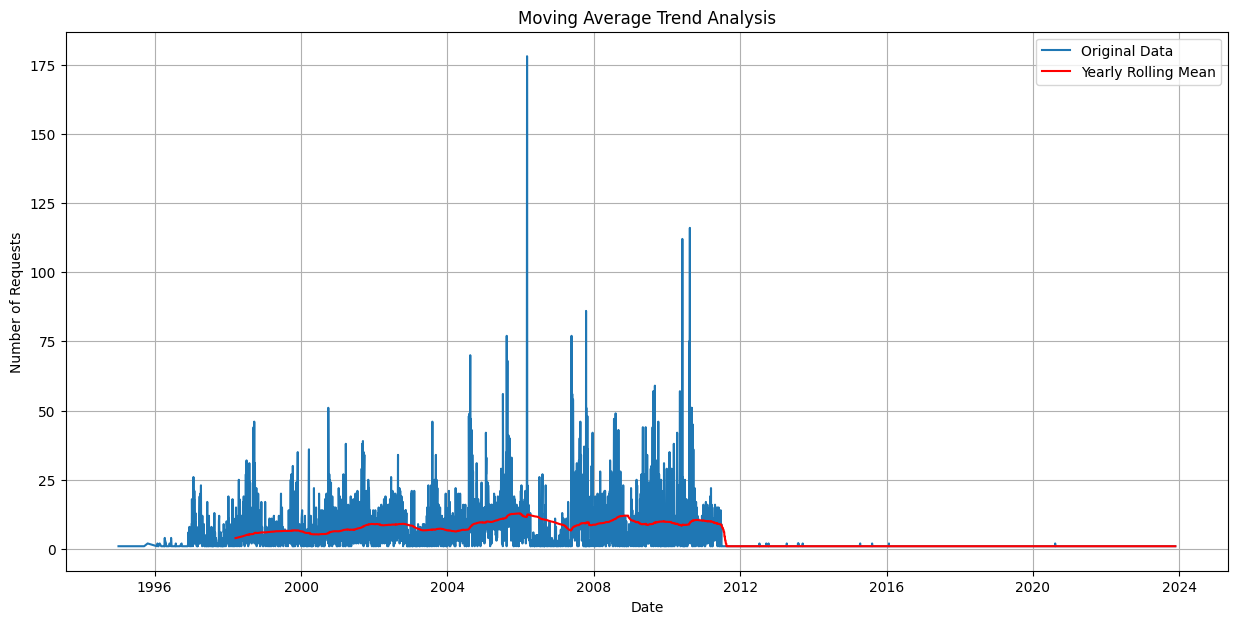

In [43]:
daily_requests['rolling_mean'] = daily_requests['number_of_requests'].rolling(window=365).mean()

plt.figure(figsize=(15,7))
plt.plot(daily_requests['requested_datetime'], daily_requests['number_of_requests'], label='Original Data')
plt.plot(daily_requests['requested_datetime'], daily_requests['rolling_mean'], color='red', label='Yearly Rolling Mean')
plt.title('Moving Average Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.show()


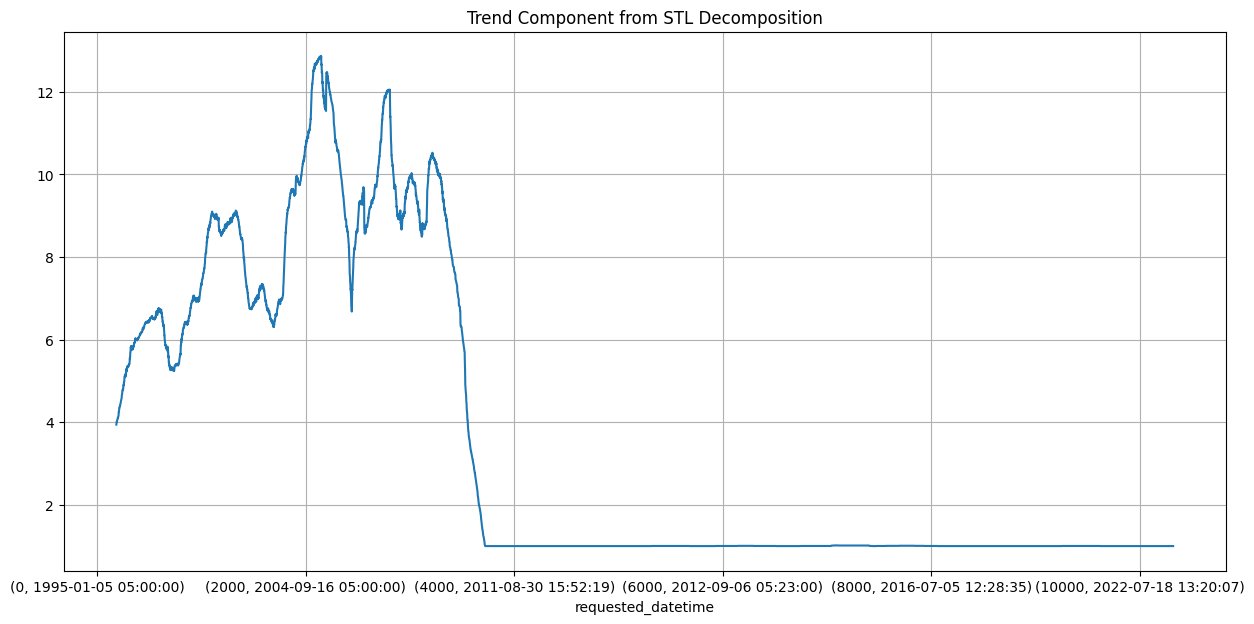

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the date as the index for decomposition
daily_requests.reset_index(inplace=True)
daily_requests.rename(columns={'index': 'requested_datetime'}, inplace=True)
daily_requests.set_index('requested_datetime', inplace=True)

# Decompose the time series
result = seasonal_decompose(daily_requests['number_of_requests'], model='additive', period=365)

# Plot the trend component
result.trend.plot(figsize=(15,7), title="Trend Component from STL Decomposition")
plt.grid(True)
plt.show()


In [45]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(daily_requests['number_of_requests'].dropna())  # handle any NaN values
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -6.195468903658665
p-value: 5.980237832059845e-08


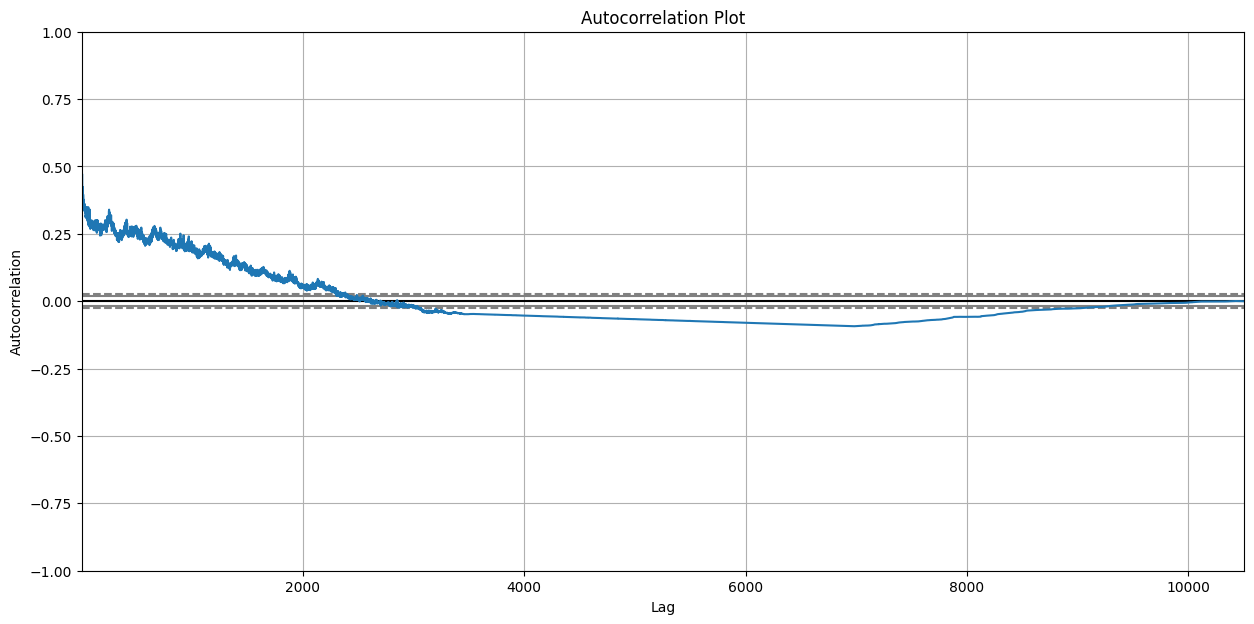

In [46]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(15,7))
autocorrelation_plot(daily_requests['number_of_requests'])
plt.title('Autocorrelation Plot')
plt.show()


In [47]:
# daily_requests['month'] = daily_requests.index.month
# monthly_patterns = daily_requests.groupby('month')['number_of_requests'].mean()

# monthly_patterns.plot(kind='bar', figsize=(15,7))
# plt.title('Average Service Requests by Month')
# plt.xlabel('Month')
# plt.ylabel('Average Number of Requests')
# plt.grid(axis='y')
# plt.show()


In [48]:
# daily_requests['year'] = daily_requests.index.year
# yearly_patterns = daily_requests.groupby('year')['number_of_requests'].mean()

# yearly_patterns.plot(kind='bar', figsize=(15,7))
# plt.title('Average Service Requests by Year')
# plt.xlabel('Year')
# plt.ylabel('Average Number of Requests')
# plt.grid(axis='y')
# plt.show()


In [ ]:
print('hello')